# The Metropolitan Museum of Art Collection

There are many ways I had a look at the dataset. I regard Medium feature to be quite interesting. More work could be done with it than I showed. I also explored the Dimensions feature quite a bit while trying to extract the object dimensions in cm.

Exploration of dataset, especially some features:
- Department (categorization)
- Artist ULAN URL (cleaning)
- Object Number (check for duplicates)
- Object Begin/End Date (check consistency)
- Object Begin date (outliers)
- Medium, Title, Object Name (some NLP exploration)
- Dimensions (trying to extract the numbers in cm)

## Imports

In [1]:
import pandas as pd
import numpy as np

import os
os.getcwd()

'/home/lieberze/School/Metropolitan_Museum_of_Art_Collection'

## Download data

In [2]:
data_original = pd.read_csv("https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv")

/home/lieberze/.conda/envs/dp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data_original.copy(deep=True)

In [4]:
data.head(2)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


## Data exploration

In [5]:
# data.columns 
data.info()
# data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [6]:
data.nunique()

Object Number              474872
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  477804
Gallery Number                609
Department                     19
AccessionYear                 280
Object Name                 28449
Title                      239091
Culture                      7180
Period                       1873
Dynasty                       403
Reign                         389
Portfolio                    3563
Constituent ID              46224
Artist Role                  6837
Artist Prefix                8046
Artist Display Name         64531
Artist Display Bio          52439
Artist Suffix                2729
Artist Alpha Sort           64489
Artist Nationality           5037
Artist Begin Date           29716
Artist End Date             29685
Artist Gender                 284
Artist ULAN URL             37235
Artist Wikidata URL         39362
Object Date                 32696
Object Begin D

In [7]:
data.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

In [8]:
display(data.shape)

(477804, 54)

Dropping unnecessary features (0 or 1 unique values)

In [9]:
data.drop(["Repository","Metadata Date"], axis=1, inplace=True)

Get rid of columns with unusable amount of missing data

In [10]:
# (pd.DataFrame(data.isna().sum()) > 45000)

## replace field that's entirely space (or empty) with NaN
# data.replace(r'^\s*$', np.nan, regex=True).isnull().sum(axis=0)

In [11]:
data = data.dropna(axis=1, thresh=45000)
data.isnull().sum(axis = 0)

Object Number               0
Is Highlight                0
Is Timeline Work            0
Is Public Domain            0
Object ID                   0
Gallery Number         426028
Department                  0
AccessionYear            3556
Object Name              1691
Title                   29185
Culture                270425
Period                 386848
Constituent ID         202269
Artist Role            204368
Artist Prefix          202269
Artist Display Name    202269
Artist Display Bio     204368
Artist Suffix          202317
Artist Alpha Sort      202269
Artist Nationality     202269
Artist Begin Date      202269
Artist End Date        202269
Artist Gender          374743
Artist ULAN URL        255783
Artist Wikidata URL    260072
Object Date             13867
Object Begin Date           0
Object End Date             0
Medium                   7120
Dimensions              75294
Credit Line               451
Geography Type         418035
Country                402053
Classifica

In [12]:
data.shape

(477804, 38)

## Department (categorization)

Convert Department feature to categorical (only 19 unique values)

In [13]:
display(data["Department"].unique())
data["Department"] = data["Department"].astype('category')
data["Department"].dtype

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

CategoricalDtype(categories=['Ancient Near Eastern Art', 'Arms and Armor',
                  'Arts of Africa, Oceania, and the Americas', 'Asian Art',
                  'Costume Institute', 'Drawings and Prints', 'Egyptian Art',
                  'European Paintings',
                  'European Sculpture and Decorative Arts',
                  'Greek and Roman Art', 'Islamic Art', 'Medieval Art',
                  'Modern and Contemporary Art', 'Musical Instruments',
                  'Photographs', 'Robert Lehman Collection',
                  'The American Wing', 'The Cloisters', 'The Libraries'],
                 ordered=False)

## Artist ULAN URL (cleaning)

For example, the number of unique values in the Artist ULAN URL can be severely decreased just by removing the "|" and replacing the "(not assigned)" and empty cells with nan

In [14]:
data["Artist ULAN URL"].unique(), data["Artist ULAN URL"].nunique()

(array(['http://vocab.getty.edu/page/ulan/500011409',
        'http://vocab.getty.edu/page/ulan/500077295', nan, ...,
        '|http://vocab.getty.edu/page/ulan/500115493||http://vocab.getty.edu/page/ulan/500115493',
        'http://vocab.getty.edu/page/ulan/500068399|http://vocab.getty.edu/page/ulan/500001915',
        '||http://vocab.getty.edu/page/ulan/500015462|'], dtype=object),
 37235)

statistics of number of artist url adresses (most have only one)

In [15]:
lens = [len(str(i).replace("|", " ").strip().split()) for i in data["Artist ULAN URL"]]
lens_df = pd.DataFrame(lens)
lens_df.describe()

,0
count,477804.000000
mean,1.234245
std,0.927681
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,124.000000


In [16]:
e = [i for i in [str(i).replace("|", " ").strip().split() for i in data["Artist ULAN URL"]]]
lst = []
for i in e:
    x = list(filter(lambda a: (a != '(not') & (a != "assigned)"), i))
    lst.append(x)
    
l = [i if i != [] else ["nan"] for i in lst]

from collections import Counter
print("number of unique values before the procedure:", data["Artist ULAN URL"].nunique())
print("number of unique values after the procedure:", len(Counter(tuple(e) for e in l)))

# statstics of new
lns = [len(i) for i in l]
x = pd.DataFrame(lns)
x.describe()

number of unique values before the procedure: 37235
number of unique values after the procedure: 27562


,0
count,477804.000000
mean,1.124566
std,0.583366
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,104.000000


The above mentioned can be applied to the column in the dataframe and also other ones, e.g.,  Artist Wikidata URL

In [17]:
data["Artist Wikidata URL"].unique()

array(['https://www.wikidata.org/wiki/Q3806459',
       'https://www.wikidata.org/wiki/Q5109648', nan, ...,
       'https://www.wikidata.org/wiki/Q16856885|https://www.wikidata.org/wiki/Q684057',
       '||https://www.wikidata.org/wiki/Q65924766|',
       '|https://www.wikidata.org/wiki/Q5941590'], dtype=object)

## Object Number (check for duplicates)

In [18]:
len(data), data["Object Number"].nunique(), data["Object Number"].isnull().sum(), data["Object Number"].duplicated().sum()

(477804, 474872, 0, 2932)

In [19]:
data[data.duplicated(subset=['Object Number'],keep=False)].head(2)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Tags,Tags AAT URL,Tags Wikidata URL
63,34.90.1,False,False,True,70,774,The American Wing,1934,Andiron,Andiron,...,"Bell metal, possibly iron",18 1/2 x 22 1/4 x 13 1/2 in. (47 x 56.5 x 34.3...,"Rogers Fund, 1934",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/70,NaN,NaN,NaN
64,34.90.2,False,False,True,71,774,The American Wing,1934,Andiron,Andiron,...,"Bell metal, possibly iron",18 1/2 x 22 1/4 x 13 1/2 in. (47 x 56.5 x 34.3...,"Rogers Fund, 1934",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/71,NaN,NaN,NaN


Object Number is not unique in some (2.9k) cases

In [20]:
data[data["Object Number"] == "42.149.6"]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Tags,Tags AAT URL,Tags Wikidata URL
6769,42.149.6,False,False,True,7231,774,The American Wing,1942,Saucer,Saucer,...,Porcelain,Diam. 5 1/2 in. (14 cm),"Gift of Mrs. J. Insley Blair, 1942",Made in,China,NaN,http://www.metmuseum.org/art/collection/search...,Eagles,http://vocab.getty.edu/page/aat/300250049,https://www.wikidata.org/wiki/Q2092297
477756,42.149.6,False,False,False,858222,NaN,Drawings and Prints,1942,Print,Summer's Labours [Border for School Diplomas],...,Etching and engraving,Plate: 16 5/16 × 12 5/16 in. (41.5 × 31.3 cm)\...,"Gift of Bella C. Landauer, 1942",NaN,NaN,Prints,http://www.metmuseum.org/art/collection/search...,NaN,NaN,NaN


 ## Object Begin/End Date (check consistency)

Exploration of unusual occurances. The Begin date should always be lower than the End date. Let's see if it's true. As we can see, in 193 cases, the begin date is greater than the end date 

In [21]:
comparison_column = np.where(data["Object Begin Date"] > data["Object End Date"], True, False)
comparison_column.sum()

193

Explore the columns where this occurs with the help of Object Date information. We can see, that many times the End Date is 0, which only means there was probably no value inserted. We could fix that particular case by replacing the 0 by the number from the Object Begin Date column

Another cases are e.g. "1861" and "9" is present because of "1861, 9th month" in Object Date column etc. This would need more work to fix. These occurances are scarce so leaving them in would not affect the dataset much.

There are also problems with B.C. and A.D., flipping Begin and End dates or "-" signs. This can be solved with the help of Object Date column. But again, the mistakes are not numerous.

In [22]:
data[data["Object Begin Date"] > data["Object End Date"]][["Object Begin Date", "Object End Date", "Object Date"]]

,Object Begin Date,Object End Date,Object Date
27051,5,0,5th–1st century B.C.
32752,-45,-55,ca. 50 B.C.
47474,1861,9,"1861, 9th month"
79173,1875,1800,1800–1875
106097,1500,0,after an early 16th-century model
...,...,...,...
452118,1,-300,1st–3rd centuries A.D.
453261,1815,0,1815 (2nd ed.)
470862,1929,0,1929
475961,1942,0,1942-


Example of replacing the zeros in End date with the Begin date value

In [23]:
small_df =data[data["Object Begin Date"] > data["Object End Date"]][["Object Begin Date", "Object End Date", "Object Date"]]
small_df["new"] = small_df.apply(lambda x: x["Object Begin Date"] if x["Object End Date"] == 0 else x["Object End Date"], axis=1)
small_df["Object End Date"] = small_df["new"]
small_df.drop(labels="new", axis=1, inplace=True)
small_df

,Object Begin Date,Object End Date,Object Date
27051,5,5,5th–1st century B.C.
32752,-45,-55,ca. 50 B.C.
47474,1861,9,"1861, 9th month"
79173,1875,1800,1800–1875
106097,1500,1500,after an early 16th-century model
...,...,...,...
452118,1,-300,1st–3rd centuries A.D.
453261,1815,1815,1815 (2nd ed.)
470862,1929,1929,1929
475961,1942,1942,1942-


## Object Begin date (outliers)

In [24]:
data_OBD = pd.DataFrame(sorted(data["Object Begin Date"]))
data_OBD.columns = ["year"]
data_OBD.describe()

,year
count,477804.000000
mean,1294.064014
std,1776.237922
min,-400000.000000
25%,1529.000000
50%,1800.000000
75%,1890.000000
max,5000.000000


Minimum year -400 000 (possible). However, maximum year 5000 of an item in the Object Begin Date column is weird, let's see what line it is

In [25]:
data[data["Object Begin Date"] == 5000][["Culture", "Period", "Object Begin Date", "Object End Date"]]

,Culture,Period,Object Begin Date,Object End Date
336255,Italian (Ancient Roman),NaN,5000,1
336484,Italian (Ancient Roman),ancient?,5000,0


We see that Object Begin and End date do not correspond (begin in 5000 and end in 1, possibly 0). Also, these objects are from Ancient Rome, so it is clearly an error.

Let's also observe the -400 000 value, As we can see, in the feature Period is written Lower Paleolithic Period, which somwhat corresponds to our vision of reality

In [26]:
data[data["Object Begin Date"] == -400000][["Culture", "Period", "Object Begin Date", "Object End Date"]]

,Culture,Period,Object Begin Date,Object End Date
364223,NaN,Lower Paleolithic Period,-400000,-240000
364231,NaN,Lower Paleolithic Period,-400000,-240000


(-10500.0, 5500.0)

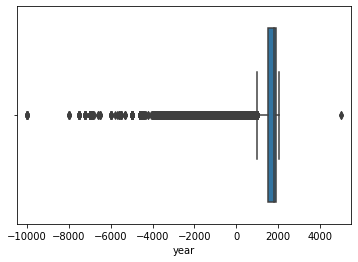

In [27]:
import seaborn as sns
sns.boxplot(x='year', data=data_OBD).set_xlim(-10500,5500)

This way we could detect more outliers etc

## Medium (some NLP exploration)

This seems to be a very interesting feature. Most occuring/representative words could be picked and used for KNN clustering or grouping by

In [28]:
data["Medium"].unique()

array(['Gold', 'Silver', 'Bronze or copper', ...,
       'Overlay  for 23.112.2889,  graphite and ink on glazed linen tracing paper',
       'Graphite on cardstock adhered to canvas, perforated on left edge',
       'ink'], dtype=object)

View the most prevalent values in the Medium feature acording to the groups created by Department feature values

In [29]:
data.groupby('Department').Medium.agg(lambda x:x.str.lower().value_counts().index[0])

Department
Ancient Near Eastern Art                                               ceramic
Arms and Armor                                                           steel
Arts of Africa, Oceania, and the Americas                              ceramic
Asian Art                                                                 silk
Costume Institute                                                         silk
Drawings and Prints                                commercial color lithograph
Egyptian Art                                                           faience
European Paintings                                               oil on canvas
European Sculpture and Decorative Arts                                    silk
Greek and Roman Art                                                 terracotta
Islamic Art                                                     stucco; carved
Medieval Art                                                      copper alloy
Modern and Contemporary Art              

### some NLP

I am using one or more of the following:
- lowercase transform
- remove stopwords
- remove punctuation
- stemming
- lemmatization
- ? regex: re.M (pattern finding)

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import spacy
from spacy.lang.en import English

port = PorterStemmer()
lemmatizer = WordNetLemmatizer()

parser = English()
nlp = spacy.load('en_core_web_sm')
stop = stopwords.words('english')

Define a function which transforms the string (lowercase, lemmatization, removing stopwords, punctuation..)

In [31]:
def ModifyString(line):
    ADJ, NOUN, ADV, ADJ_SAT, VERB = "a", "n", "r", "s", "v"

    line = re.sub(r'[^\w\s]', '', line)
        # lowercase
    line = line.lower()
        # split
    line = line.split() 
        # remove stopwords
    line = [x for x in line if x not in stop]
        # stemming (probably unnecessary for now)
    # print(" ".join(port.stem(word) for word in line))
        # lemmatization of nouns
    line = [lemmatizer.lemmatize(word, pos="n") for word in line]
        # lemmatization of adjectives
    line = [lemmatizer.lemmatize(word, pos="a") for word in line]
        # lemmatization of adverbs
    line = [lemmatizer.lemmatize(word, pos="s") for word in line]
    # join back together
    line = " ".join(line)
    return line

Example on some longer rows

In [32]:
import re
import random
random.seed(42)

Medium_data = list(data["Medium"])

longer_words_example = [i for i in Medium_data if len(str(i))>30]
# for line in longer_words_example[240:260]:
for line in random.sample(longer_words_example, 10):
    print("Before:", line)
    line = ModifyString(line)
    print("After: ", line)
    print()

Before: Etching, printed in brown ink; second state of two (De Vesme & Calabi)
After:  etching printed brown ink second state two de vesme calabi

Before: Hanging scroll; ink and color on paper
After:  hanging scroll ink color paper

Before: Gouache and watercolor on off-white wove paper, mounted on academy board
After:  gouache watercolor offwhite wove paper mounted academy board

Before: Commercial color photolithograph
After:  commercial color photolithograph

Before: Salted paper print from paper negative
After:  salted paper print paper negative

Before: Albumen silver print from glass negative
After:  albumen silver print glass negative

Before: Bobbin lace, point d'Angleterre
After:  bobbin lace point dangleterre

Before: Nephrite; greenish-white jade (dish); mottled green nephrite with coral red berries (plants)
After:  nephrite greenishwhite jade dish mottled green nephrite coral red berry plant

Before: Earthenware; white slipped,incised and splashed under a colorless glaze
A

Observe the changes

In [33]:
data["New_Medium"]  = data["Medium"].apply(lambda x: ModifyString(str(x)))
print("Number of unique values before:", data["Medium"].nunique(),
      "\nNumber of unique values after:", data["New_Medium"].nunique()
     )

Number of unique values before: 64685 
Number of unique values after: 57239


In [34]:
data["New_Medium"].unique()

array(['gold', 'silver', 'bronze copper', ...,
       'graphite wove paper perforated lined tape adhered left edge binding overlay 231122889a graphite ink glazed linen tracing paper',
       'overlay 231122889 graphite ink glazed linen tracing paper',
       'graphite cardstock adhered canvas perforated left edge'],
      dtype=object)

Maybe also some spellchecking (e.g., using TextBlob) could be useful. However, there are many words that are unique (chinese names etc), so I am not entirely sure it is a good idea. Example below (correction of graphite to graphics :))

In [35]:
from textblob import TextBlob # and use .correct() function
a = "it is udeful for electrcity"
a = "graphite cardstock adhered canvas perforated left edge"
str(TextBlob(a).correct())

'graphics cardstock adhered canvas perforated left edge'

Or combining Object Name and Medium and somehow extracting the info using word2vec (armour-metal etc)

Extracting unique words of the whole dataset can be then used further

In [36]:
unique_Medium = list(data.New_Medium.unique())
len(unique_Medium),unique_Medium[:20]

(57239,
 ['gold',
  'silver',
  'bronze copper',
  'nickel',
  'pressed glass',
  'mahogany laminated',
  'gold amethyst spessartites tourmaline fresh water pearl quartz rock crystal enamel',
  'oak tulip poplar',
  'earthenware basalt',
  'paper',
  'brass iron',
  'brass',
  'iron',
  'bell metal',
  'bell metal possibly iron',
  'iron brass',
  'brass steel',
  'wrought iron',
  'bronze glass iron',
  'earthenware'])

In [37]:
from collections import Counter
import itertools
unique_Medium_words = [[i for i in str(x).split()] for x in unique_Medium]
unique_Medium_words = list(itertools.chain(*unique_Medium_words))
unique_Medium_words_count = Counter(unique_Medium_words)
unique_Medium_words_count_sorted = {k: v for k, v in sorted(unique_Medium_words_count.items(), key=lambda item: item[1], reverse=True)}

view the top 10 occuring words in medium (with the total number of occurences)

In [38]:
print("number of unique words in Medium:", len(unique_Medium_words_count_sorted))
pd.DataFrame(unique_Medium_words_count_sorted,index=[0]).T.head(10)

number of unique words in Medium: 9398


,0
ink,10168
paper,9496
brown,7257
black,7064
wood,6393
gold,6134
pen,5998
silk,5956
silver,4717
chalk,4365


some threshold could be found and used for one-hot encoding or some other things

## Title

In [39]:
data["Title"].unique(), data["Title"].nunique()

(array(['One-dollar Liberty Head Coin', 'Ten-dollar Liberty Head Coin',
        'Two-and-a-Half Dollar Coin', ...,
        'Forest landscape with cattle drinking, a woman riding and other travellers',
        'Phaeton with folding top', 'Stanhope Phaeton'], dtype=object),
 239091)

In [40]:
import re
import random
random.seed(42)

Title_data = list(data["Title"])

longer_words_example = [i for i in Title_data if len(str(i))>30]
for line in random.sample(longer_words_example, 10):
    print("Before:", line)
    line = ModifyString(line)
    print("After: ", line)
    print()

Before: Terracotta fragment of a mastoid (drinking cup with narrow base) or a kyathos (cup-shaped ladle)
After:  terracotta fragment mastoid drinking cup narrow base kyathos cupshaped ladle

Before: [Plantation and Surrounding Wooden Houses in Field, From Moving Automobile, Macon, Georgia]
After:  plantation surrounding wooden house field moving automobile macon georgia

Before: 南宋  佚名  泛舟柳塘圖  團扇|Boating by a Willow Bank
After:  南宋 佚名 泛舟柳塘圖 團扇boating willow bank

Before: The Black Sun Press Portfolio, vol. 1, Summer 1945
After:  black sun press portfolio vol 1 summer 1945

Before: Lilac Clematis (Atragene occidentalis)
After:  lilac clematis atragene occidentalis

Before: Design for Vis-à-vis Composite, no. 601
After:  design visàvis composite 601

Before: St. James Major, from the series The Apostles
After:  st james major series apostle

Before: Single Spout Bottle with Gadrooned Figure
After:  single spout bottle gadrooned figure

Before: Concours pour le Prix de l'Etude des Têtes e

In [41]:
data["New_Title"]  = data["Title"].apply(lambda x: ModifyString(str(x)))
print("Number of unique values before:", data["Title"].nunique(),
      "\nNumber of unique values after:", data["New_Title"].nunique()
     )

Number of unique values before: 239091 
Number of unique values after: 230618


## Object Name

In [42]:
data["Object Name"].unique(), data["Object Name"].nunique()

(array(['Coin', 'Peso', 'Centavos', ..., 'Book, print, ephemera',
        'Book; prints', 'Ephemera; postcard'], dtype=object),
 28449)

In [43]:
import re
import random
random.seed(42)

Object_data = list(data["Object Name"])

longer_words_example = [i for i in Object_data if len(str(i))>30]
for line in random.sample(longer_words_example, 10):
    print("Before:", line)
    line = ModifyString(line)
    print("After: ", line)
    print()

Before: Kylix fragment; lipped inside and out
After:  kylix fragment lipped inside

Before: Neck-amphora of Panathenaic shape
After:  neckamphora panathenaic shape

Before: Executioner's sword with scabbard
After:  executioner sword scabbard

Before: Book Print Ornament & Architecture
After:  book print ornament architecture

Before: Collection Ornament & Architecture
After:  collection ornament architecture

Before: Drawing ; Ornament and  Architecture
After:  drawing ornament architecture

Before: Book ; Ornament and architecture
After:  book ornament architecture

Before: Print, Fete, Ornament & Architecture
After:  print fete ornament architecture

Before: Book Print Ornament & Architecture
After:  book print ornament architecture

Before: Earring with pendant in the form of Eros
After:  earring pendant form eros



The above includes also some errors which could be worked on. e.g., Pair of stirrups (<i>Tsubo abumi</i>) gets transformed to: pair stirrup itsubo abumii (additional "i" at the ends)


In [44]:
data["New_Object_Name"]  = data["Object Name"].apply(lambda x: ModifyString(str(x)))
print("Number of unique values before:", data["Object Name"].nunique(),
      "\nNumber of unique values after:", data["New_Object_Name"].nunique()
     )

Number of unique values before: 28449 
Number of unique values after: 25514


In [45]:
data["New_Object_Name"].unique()

array(['coin', 'peso', 'centavo', ..., 'presentation box menuki',
       'book print ephemera', 'ephemera postcard'], dtype=object)

## Dimensions (trying to extract the numbers in cm)

In [46]:
data["Dimensions"].nunique(), data["Dimensions"].unique()

(259819,
 array(['Dimensions unavailable', 'Diam. 11/16 in. (1.7 cm)',
        'Diam. 1/2 in. (1.3 cm)', ...,
        'Plate: 10 3/8 × 7 1/4 in. (26.4 × 18.4 cm)',
        'Plate: 10 7/16 × 7 5/16 in. (26.5 × 18.5 cm)',
        'Plate: 11 5/8 × 7 5/8 in. (29.6 × 19.4 cm)'], dtype=object))

How many unavailable?

In [47]:
len(data[data["Dimensions"]=="Dimensions unavailable"])

385

In [48]:
data["Dimensions"].isna().sum()

75294

Transform the values to np.NaN and check the result

In [49]:
data["Dimensions"] = data["Dimensions"].apply(lambda x: np.NaN if x == "Dimensions unavailable" else x)
len(data[data["Dimensions"]=="Dimensions unavailable"]), data["Dimensions"].isna().sum()

(0, 75679)

In [50]:
data.Dimensions.unique()

array([nan, 'Diam. 11/16 in. (1.7 cm)', 'Diam. 1/2 in. (1.3 cm)', ...,
       'Plate: 10 3/8 × 7 1/4 in. (26.4 × 18.4 cm)',
       'Plate: 10 7/16 × 7 5/16 in. (26.5 × 18.5 cm)',
       'Plate: 11 5/8 × 7 5/8 in. (29.6 × 19.4 cm)'], dtype=object)

Creating some variables to help with data exploration without having to touch the original data 

In [51]:
dim_cm = data[data["Dimensions"].str.contains("cm", na=False)]
dim_in = data[data["Dimensions"].str.contains("in", na=False)]
dim_na = data["Dimensions"].isna().sum()
len(dim_cm), len(dim_in), dim_na,  dim_na+ len(dim_in), len(data)

(388762, 393931, 75679, 469610, 477804)

Quick exploration of where the centimeters info is located. It looks like it is in brackets, usually the last item

In [52]:
df_cm = data[data["Dimensions"].str.contains("cm", na=False)]["Dimensions"]
df_cm[:-50]

2                                  Diam. 11/16 in. (1.7 cm)
3                                  Diam. 11/16 in. (1.7 cm)
4                                  Diam. 11/16 in. (1.7 cm)
5                                  Diam. 11/16 in. (1.7 cm)
6                                  Diam. 11/16 in. (1.7 cm)
                                ...                        
477749       Sheet: 21 15/16 × 13 5/16 in. (55.7 × 33.8 cm)
477750    Plate: 19 15/16 × 14 3/16 in. (50.7 × 36 cm)\r...
477751    Plate: 15 1/4 × 14 13/16 in. (38.8 × 37.7 cm)\...
477752         Sheet: 11 11/16 × 8 7/8 in. (29.7 × 22.5 cm)
477753    Plate: 12 15/16 × 9 3/4 in. (32.9 × 24.7 cm)\r...
Name: Dimensions, Length: 388712, dtype: object

Function for selection of the proper slice of string split by "(" and subsequently by ")" - proper == contains a string that we search for (now "cm", later "in")

In [53]:
def select_part_with_certain_string(list_of_strings, string_to_search_for):
    for item in list_of_strings:
        if string_to_search_for in item:
            return item
            break

Does it work? Compare extracted for containing "cm" with the original

In [54]:
df_cm_extracted = df_cm.str.split("(").apply(lambda x: select_part_with_certain_string(x, "cm"))
df_cm_extracted = df_cm_extracted.str.split(")").apply(lambda x: select_part_with_certain_string(x, "cm"))
df_cm_extracted.str.contains("cm", na=False).sum(), len(df_cm_extracted)

(388762, 388762)

Let's look at the result of centimeter values extraction (randomly to show that there are still some inches left - index 6393 for example)

In [55]:
len(df_cm_extracted.unique()), df_cm_extracted[6155:6170]

(165040,
 6389           73 x 27.6 cm
 6390           73 x 27.6 cm
 6391         76.2 x 35.6 cm
 6392         76.2 x 35.6 cm
 6393    13.8 x 72.1 x 21 cm
 6394       2.3 cm x 624 in.
 6395         49.5 x 58.4 cm
 6396         49.5 x 58.4 cm
 6397          13.3 x 5.1 cm
 6398                15.9 cm
 6399           24.4 x 21 cm
 6400                15.9 cm
 6401        111.8 × 63.5 cm
 6402                77.5 cm
 6403                 3.5 cm
 Name: Dimensions, dtype: object)

The above code works, so let's apply it on the dataset column

In [56]:
data["Dimensions"] = data["Dimensions"].apply(lambda x: select_part_with_certain_string(str(x).split("("), "cm"))
data["Dimensions"] = data["Dimensions"].apply(lambda x: select_part_with_certain_string(str(x).split(")"), "cm"))

In [57]:
data["Dimensions"].unique()

array([None, '1.7 cm', '1.3 cm', ..., '17.4 × 22.8 cm', '34 × 56.5 cm',
       '29.6 × 19.4 cm'], dtype=object)

Check for occurance of inches

In [58]:
dim_in = data[data["Dimensions"].str.contains("in", na=False)]
len(dim_in)

5784

According to the following exploration it seems like splitting by "\n" could be also useful, snce there is quite a lot of such values

In [59]:
dim_in = data[data["Dimensions"].str.contains("in", na=False)]
display(dim_in.Dimensions[300:310])
print("number of lines with \\n character:", len(data[data["Dimensions"].str.contains("\n", na=False)]))

122133     L. 7 1/2 inches\r\n19.1 cm
122134     L. 4 3/4 inches\r\n12.1 cm
122135         L. 7 inches\r\n17.8 cm
122136    L. 10 1/4 inches\r\n26.0 cm
122137     L. 7 5/8 inches\r\n19.4 cm
122138     L. 5 1/2 inches\r\n14.0 cm
122139     L. 4 3/8 inches\r\n11.1 cm
122140         L. 6 inches\r\n15.2 cm
122141     L. 5 3/4 inches\r\n14.6 cm
122142         L. 6 inches\r\n15.2 cm
Name: Dimensions, dtype: object

number of lines with \n character: 6542


In [60]:
data["Dimensions"] = data["Dimensions"].apply(lambda x: select_part_with_certain_string(str(x).split("\n"), "cm"))
data["Dimensions"] = data["Dimensions"].apply(lambda x: select_part_with_certain_string(str(x).split("\r"), "cm"))
data["Dimensions"] = data["Dimensions"].apply(lambda x: select_part_with_certain_string(str(x).split("inches"), "cm"))

Explore lines with "in" (inches)

In [61]:
data[data.Dimensions.str.contains("in", na=False)].Dimensions

4171                                   H. 4 3/8 in. 11.1 cm
6394                                       2.3 cm x 624 in.
13279                                     504 in. x 45.7 cm
13280                                     504 in. x 45.7 cm
19161                               ; L. 19 1/2 in. 49.5 cm
                                ...                        
385841                            Diam. large rings 0.9 cm 
398566                          H of taller coffin: 200 cm 
420056    H. 27-1/2 × W. 22 x D. 1-1/2 in.  69.9 × 55.9×...
467618    Assembled instrument: max depth: 12.5cm; max w...
477371                                  W. 7/16 in. *1.1 cm
Name: Dimensions, Length: 304, dtype: object

get rid of them

In [62]:
def split_by_in(item):
    if item == None:
        return item
    else:
        if len(item.split("in.")) > 1:
            return item.split("in.")[1]
        else:
            return item
        
data["Dimensions"] = data["Dimensions"].apply(lambda x: split_by_in(x))

In [63]:
data.Dimensions[30:50]

30                    1.9 cm
31                    5.4 cm
32            7 x 8.9 x 7 cm
33       61.9 x 37.1 x 13 cm
34       49.4 x 33 x 23.5 cm
35    101.6 x 64.8 x 87.6 cm
36                   30.5 cm
37                   31.4 cm
38            27.9 x 22.9 cm
39                   16.7 cm
40                   15.9 cm
41     78.4 x 63.5 x 35.2 cm
42     78.4 x 63.5 x 35.2 cm
43                   68.6 cm
44                   68.6 cm
45                   40.6 cm
46                   40.6 cm
47                   43.2 cm
48                   43.2 cm
49                   29.2 cm
Name: Dimensions, dtype: object

In [64]:
data["Dimensions"] = data["Dimensions"].str.strip().str.strip(".").str.strip("cm")

In [65]:
data["Dimensions"].unique()

array([None, '1.7 ', '1.3 ', ..., '17.4 × 22.8 ', '34 × 56.5 ',
       '29.6 × 19.4 '], dtype=object)

Preparing to delete alpha characters and some additional ones

In [66]:
import re
def delete_alpha(list_of_words):
    chars_to_replace = ["&", "+", "-", "×", ":", "=", ";", ","]
    keep = []
    for item in list_of_words:
        if re.search('[a-zA-Z]', item):
            pass 
        else:
            for c in chars_to_replace:
                item = item.replace(c, " ")
            item = item.strip().strip("/").strip()
            if item != "":
                keep.append(item)
    return " ".join(keep)

Observing the result (slice of the unique values)

In [67]:
data.Dimensions.unique()[30:60], len(data.Dimensions.unique())

(array(['64.8 x 56.5 x 34.3 ', '41 x 38.7 x 20.6 ', '48.9 x 49.5 x 29.8 ',
        '52.7 x 49.5 x 29.8 ', '47.6 x 43.2 ', '59.1 x 59.7 ',
        '53.3 x 40 ', '59.1 x 46.4 ', '28.9 x 36.8 x 30.5 ',
        '47.6 x 44.5 x 27.3 ', '57.2 x 68.6 x 33 ', '61 x 29.2 x 40.6 ',
        '57.2 ', '41 x 25.4 x 37.8 ', '47 x 43.2 ', '62.2 × 33 × 51.8 ',
        '53.7 ', '80 x 35.6 x 59.7 ', '63.5 x 38.1 x 88.9 ',
        '57.5 x 27.3 x 52.1 ', '9.2 ', '7 ', '109.2 ', '210.8 x 148.6 ',
        '640.1 x 701 ', '44.5 ', '45.4 x 43.2 x 20 ',
        '86.4 x 59.7 x 48.3 ', '101.6 x 63.5 x 44.5 ',
        '111.8 x 61 x 38.1 '], dtype=object),
 158686)

## Culture

In [68]:
len(data["Culture"].unique()), len(data["Culture"]) - data["Culture"].isna().sum(), data["Culture"].unique()

(7181,
 207379,
 array([nan, 'Mexican', 'Guatemalan', ...,
        'India, Kolkata (formerly Calcutta)', 'Western India, Karnataka',
        'India, Madurai, Tamil Nadu'], dtype=object))

In [69]:
...

Ellipsis

## Other commentary

For addtional research:

- Is there enough data? What data is missing? 
- What would be an interesting graph? What do we want to observe in general? Sort the objects by....?
- Convert to numeric, date type etc..
- Impute value of department...

some basic ideas: https://themuseumsainetwork.files.wordpress.com/2020/02/20190317_museums-and-ai-toolkit_rl_web.pdf